In [1]:
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-x99td_9o
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-x99td_9o
  Resolved https://github.com/google/lightweight_mmm.git to commit f61a18b9883c2dccac8e360970935e3b6ee8265e
  Preparing metadata (setup.py) ... done


In [11]:
# Importing necessary libraries
import jax.numpy as jnp
import numpyro
numpyro.set_host_device_count(2)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

# Load your data (replace with the actual path to your CSV file)
#data_path = '/content/dummyData - dataFrame_v2 (4).csv'
data_path = '/content/dummyData - dataFrame_v2 (6).csv'
data = pd.read_csv(data_path, index_col=False)

#data['leads'] = data['leads'].astype(int).copy()
data['cost_af'] = data['cost_af'].astype(int).copy()
data['cost_ga'] = data['cost_ga'].astype(int).copy()
data['cost_fb'] = data['cost_fb'].astype(int).copy()
data['leads'] = data['leads'].astype(int).copy()
data['cost_bing'] = data['cost_bing'].astype(int).copy()
data['newspaper'] = data['newspaper'].astype(bool).copy()
#data['week'] = pd.to_datetime(data['week'])
#data.fillna(0, inplace=True)
#data['weekday'] = data['weekday'].astype(str).copy()
#data.head()

# Replacing NaN values with 1's
#data.replace(0, 1, inplace=True)

data.head(150)

,week,leads,cost_af,cost_bing,cost_fb,cost_ga,flyers,newspaper
0,2021-01-04,564,0,0,16149,3754,192953,False
1,2021-01-11,458,0,0,36109,11607,630319,False
2,2021-01-18,545,0,0,24869,8712,136910,False
3,2021-01-25,595,0,0,25333,6399,156338,False
4,2021-02-01,572,0,0,25382,8640,558756,False
...,...,...,...,...,...,...,...,...
131,2023-07-10,498,6285,1887,14247,33598,48025,True
132,2023-07-17,490,6335,1884,14366,31435,66610,True
133,2023-07-24,482,6360,1835,14323,28271,241104,False
134,2023-07-31,555,6386,1966,14593,28666,1360068,False


In [3]:
!pip install sweetviz

In [4]:
import sweetviz as sv

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do


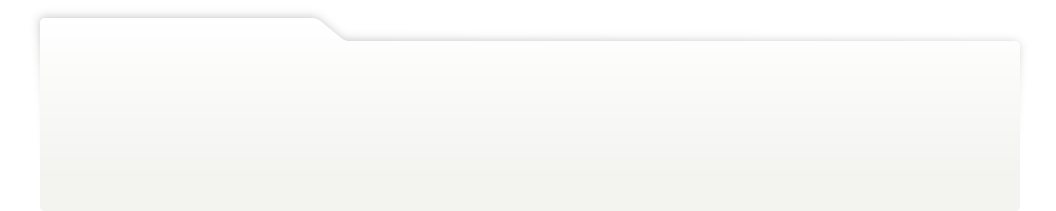
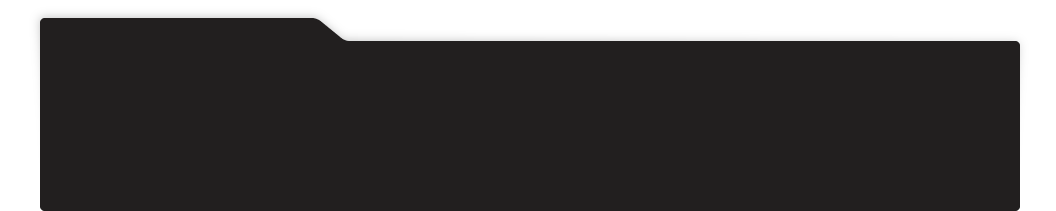
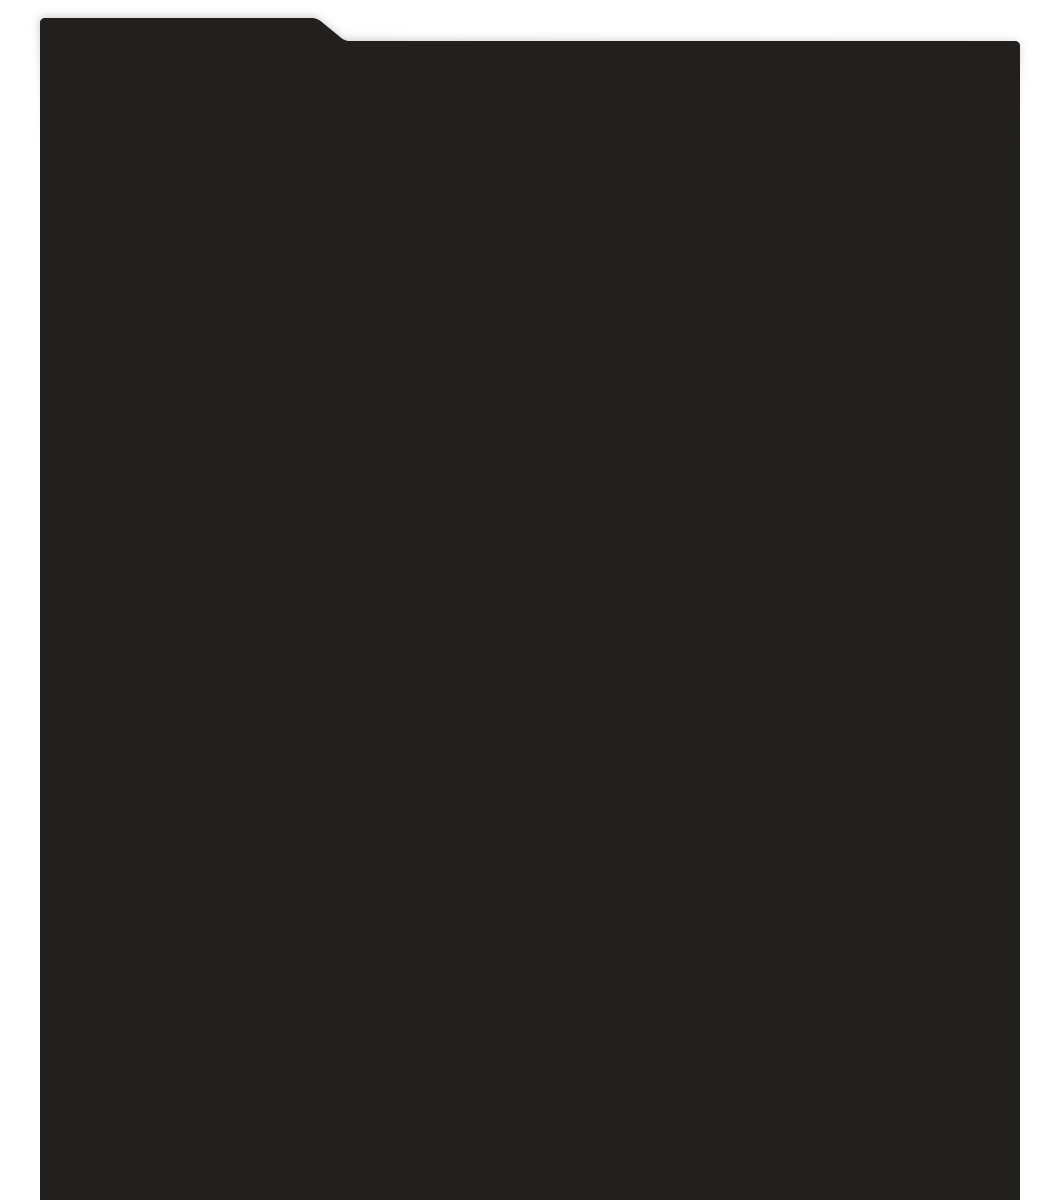
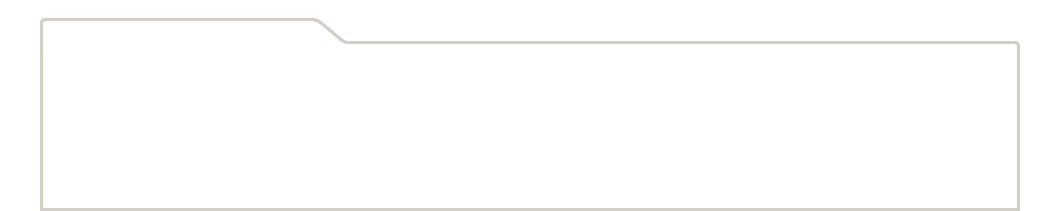
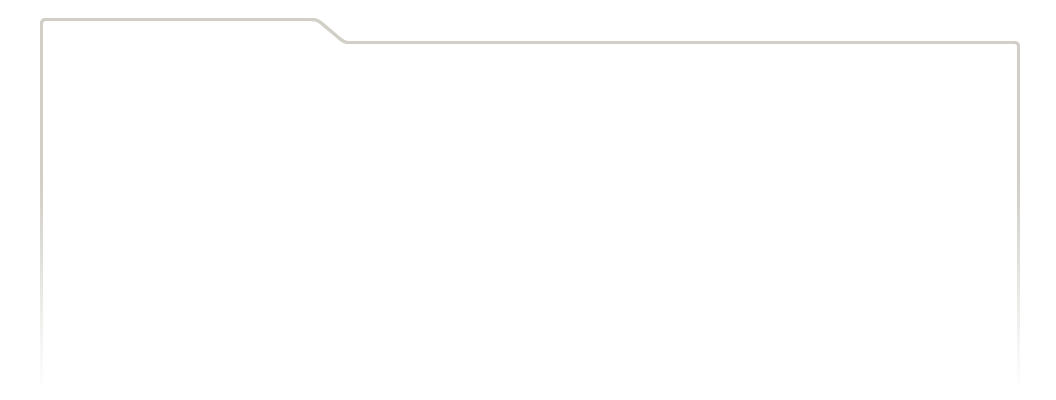
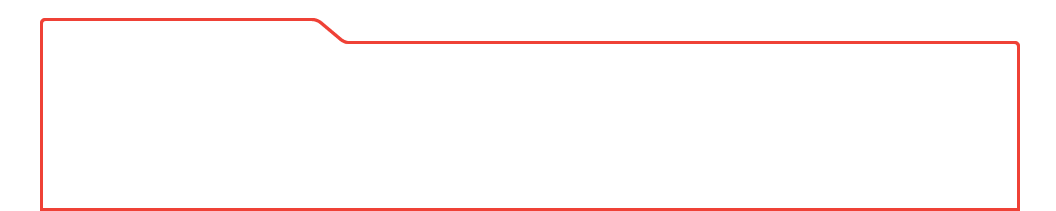
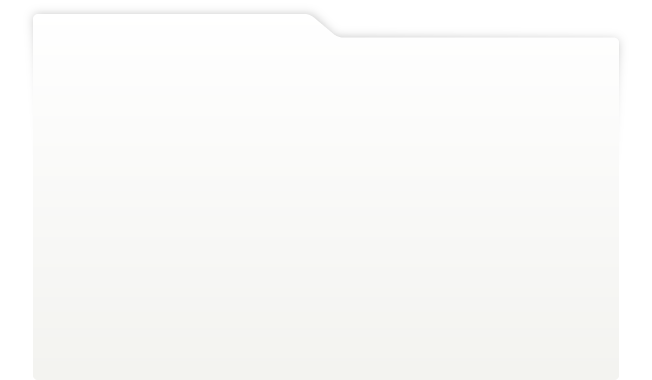
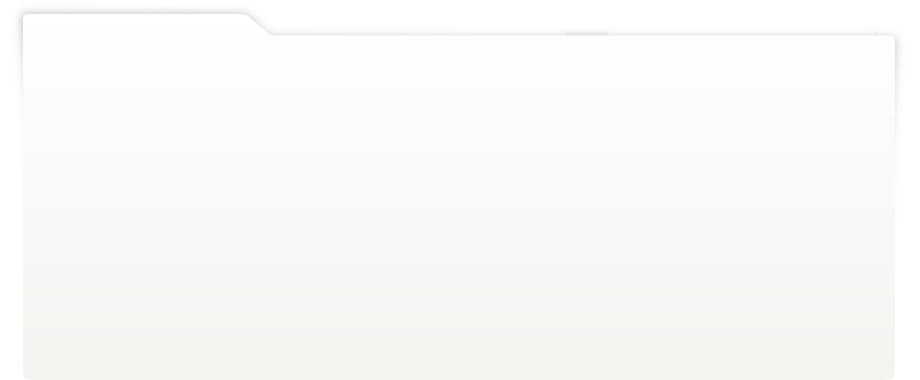
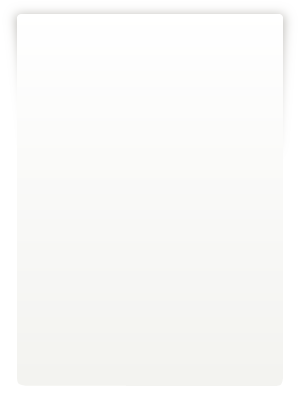
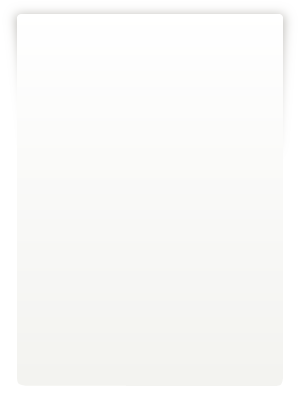
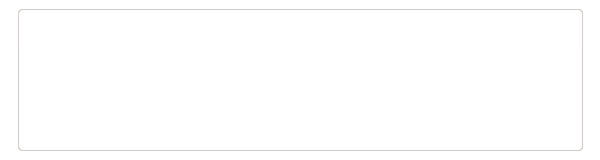
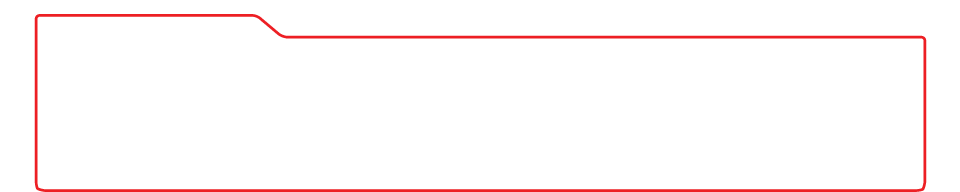
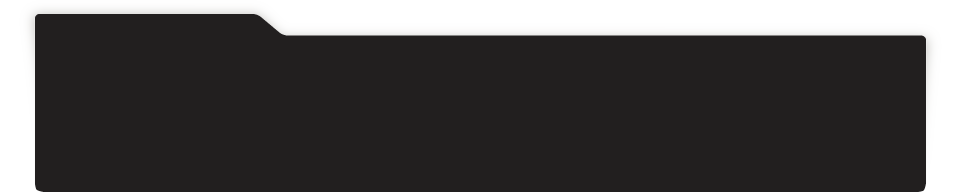
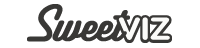
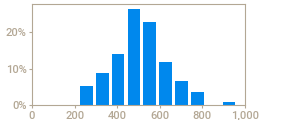
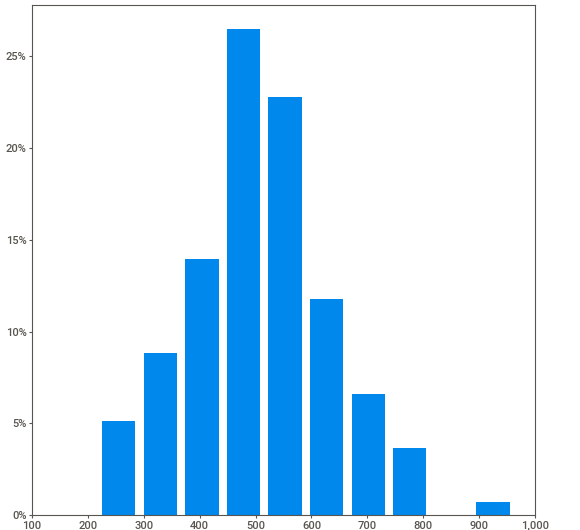
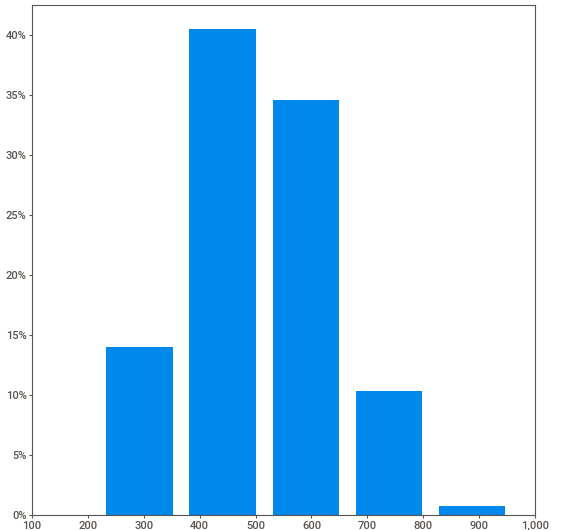
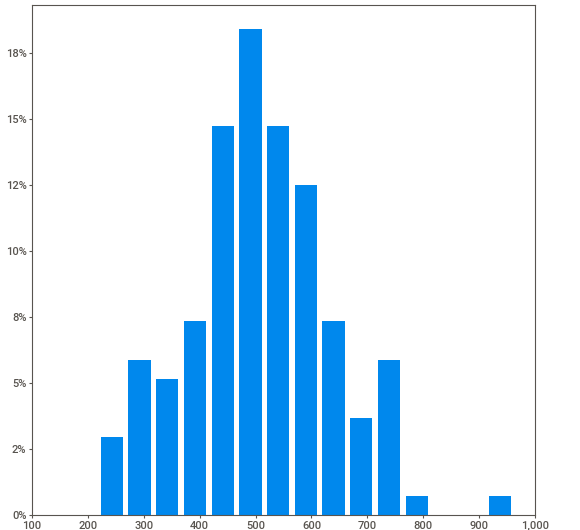
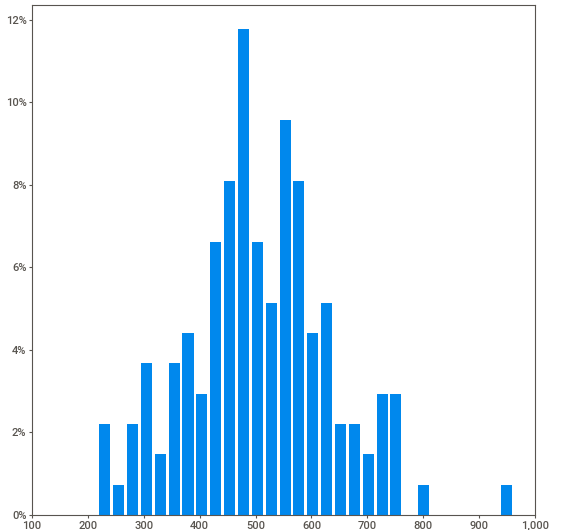
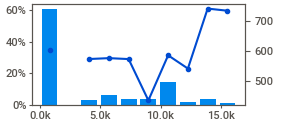
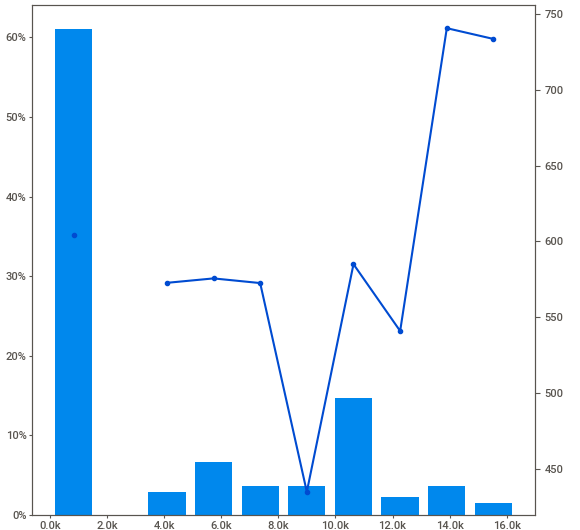
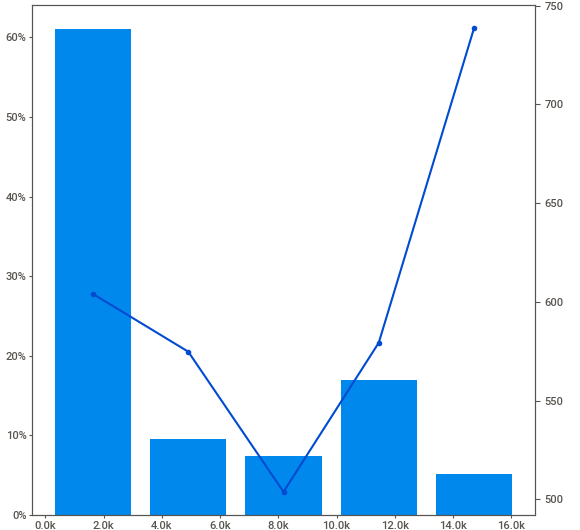
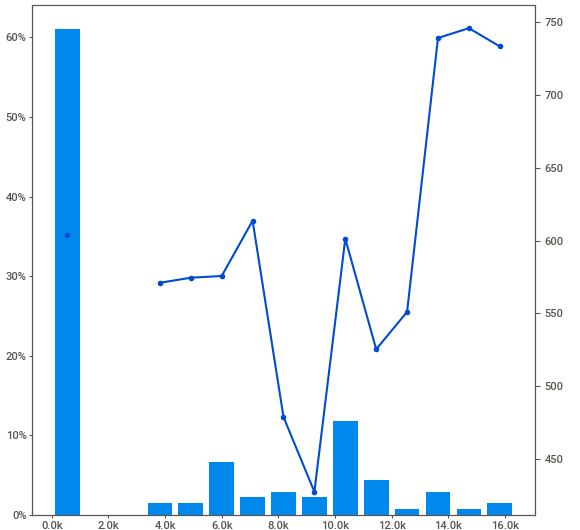
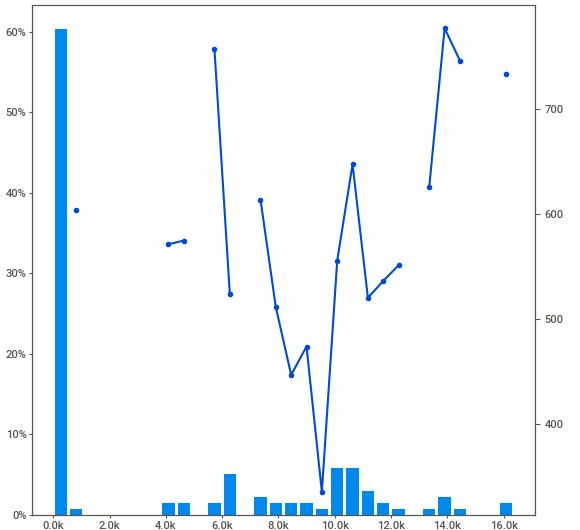
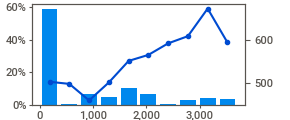
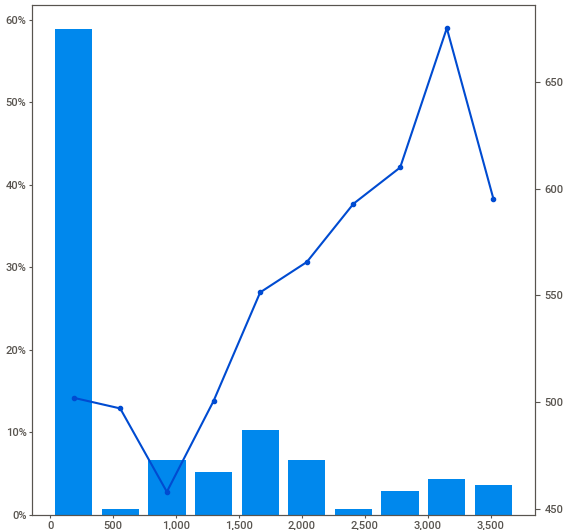
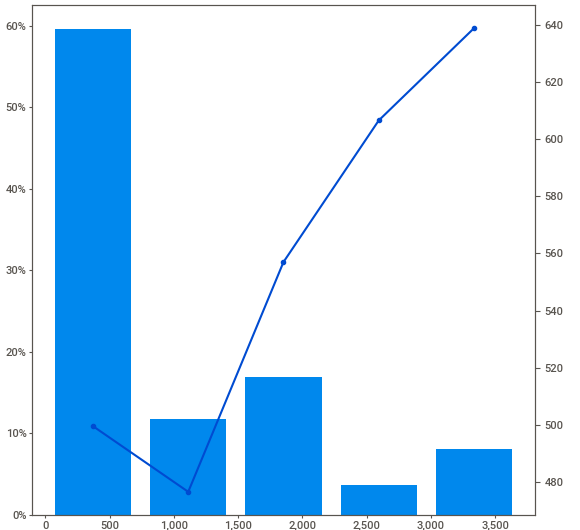
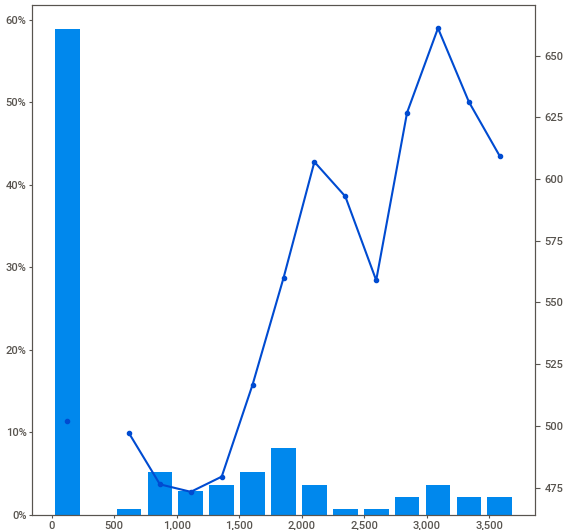
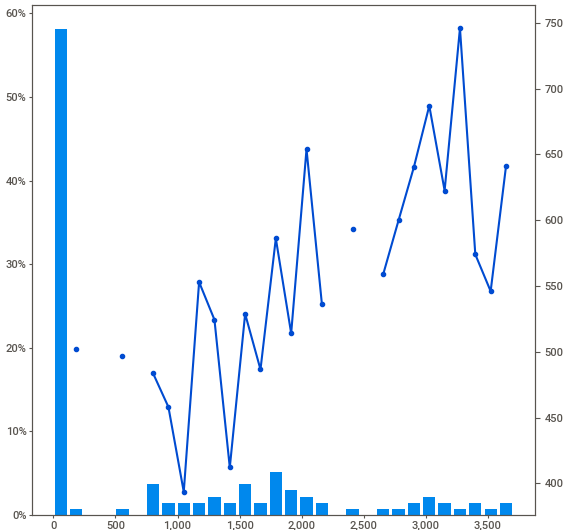
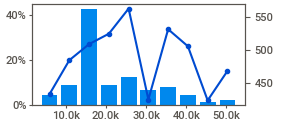
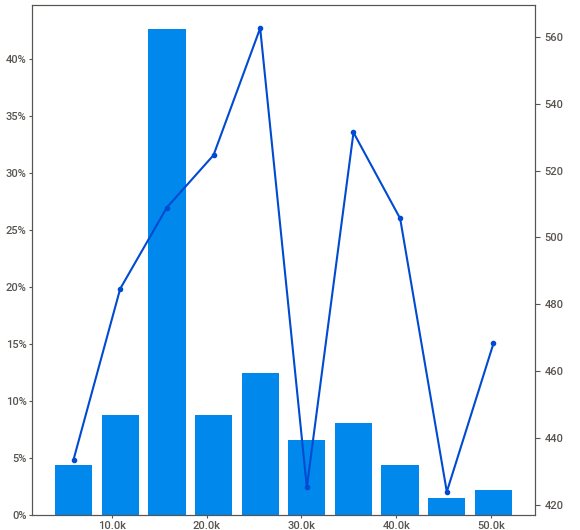
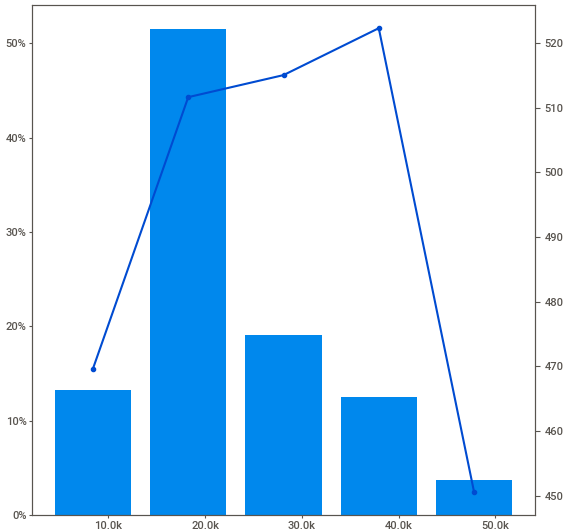
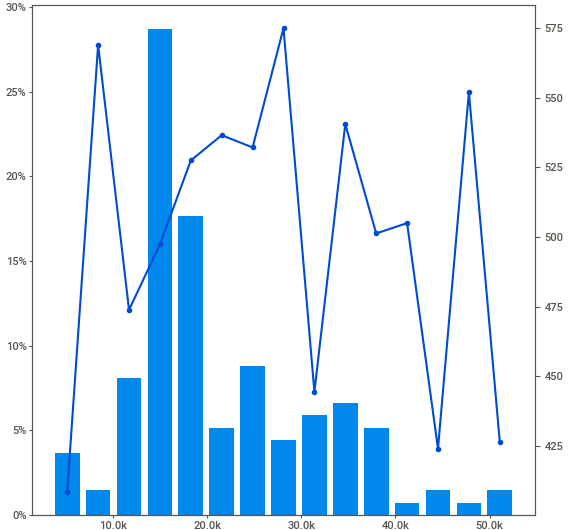
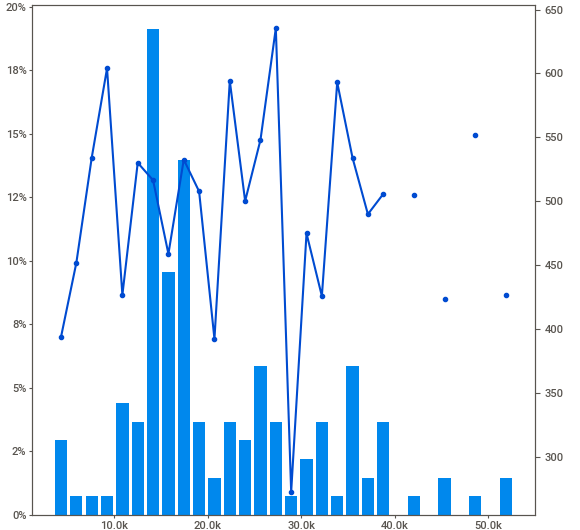
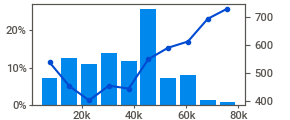
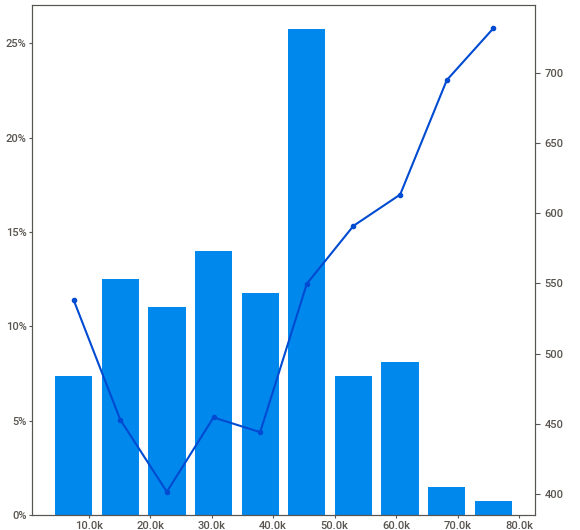
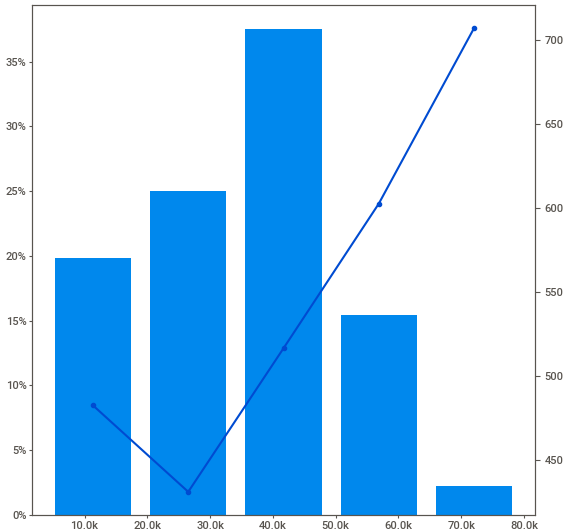
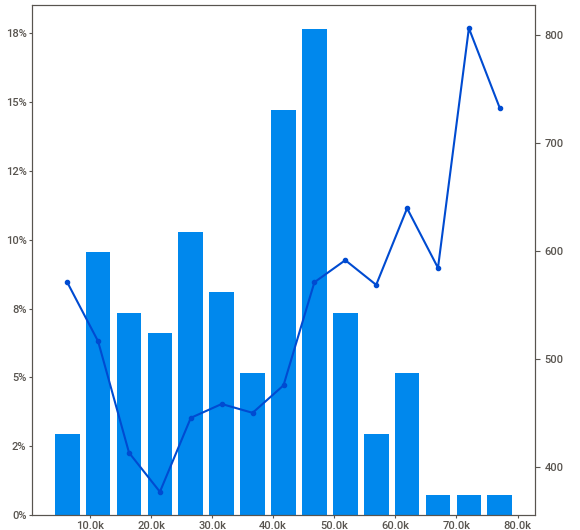
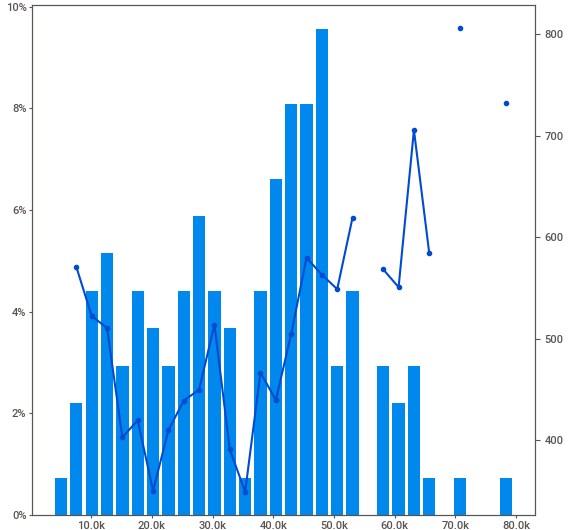
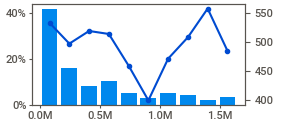
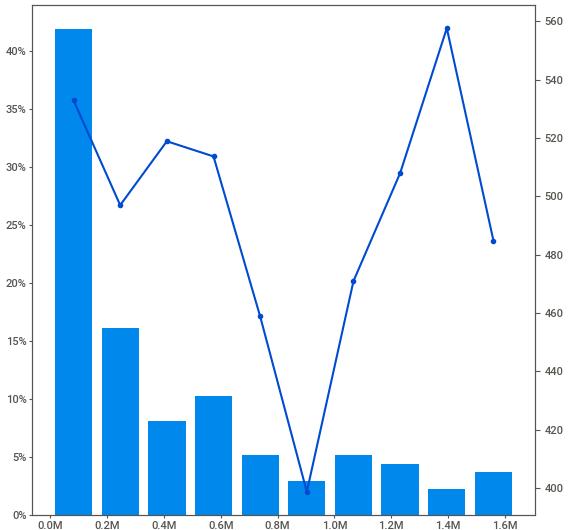
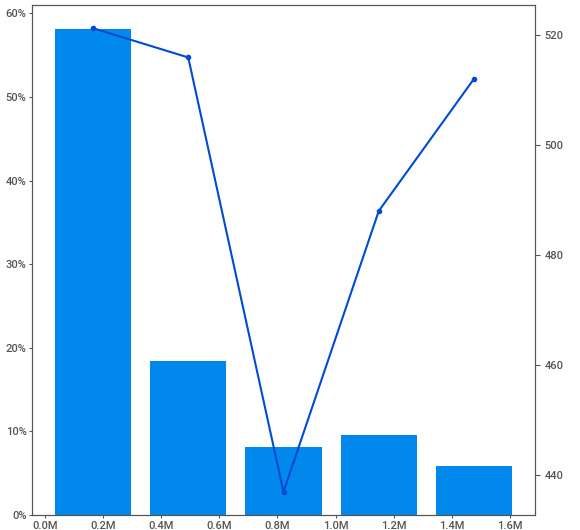
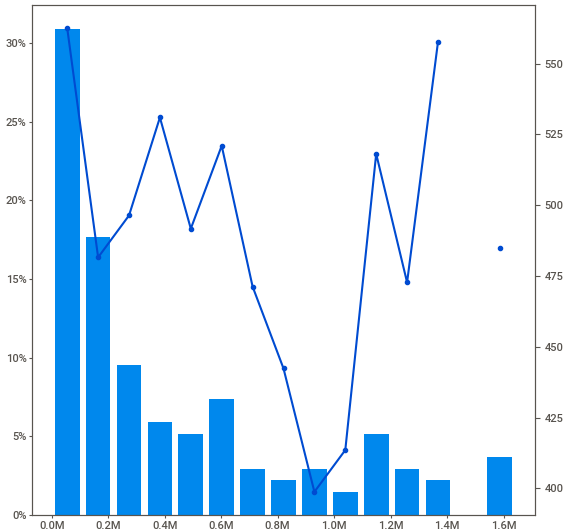
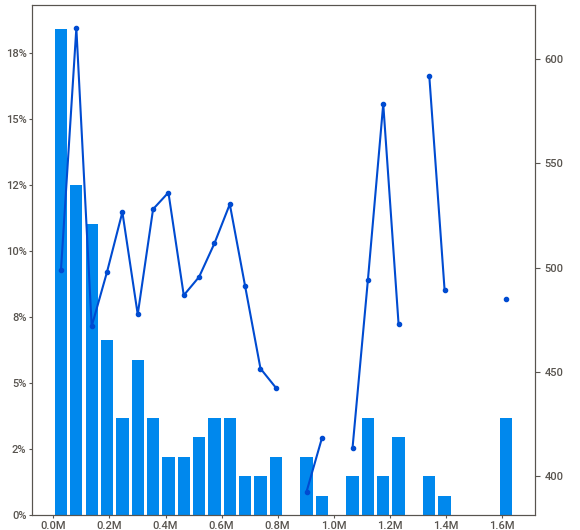
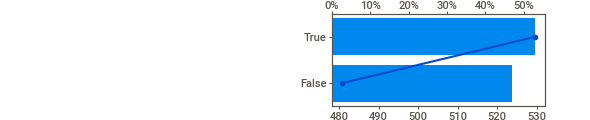
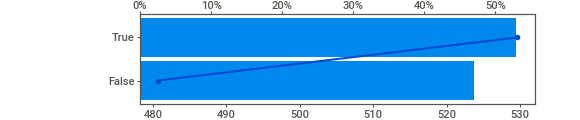
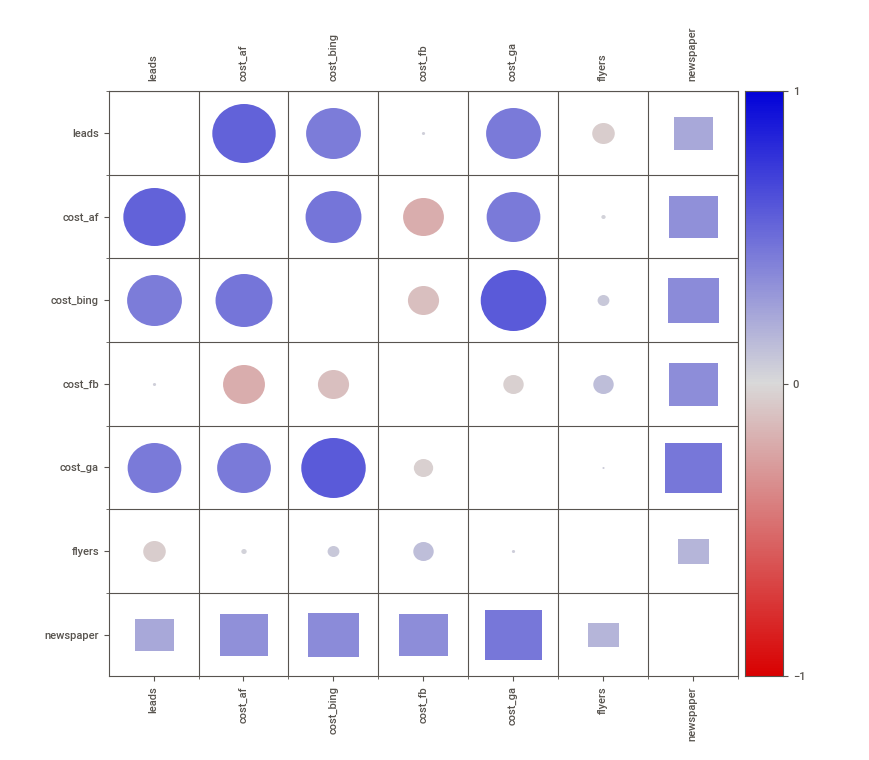
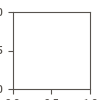

In [12]:
data = data
report = sv.analyze(data, target_feat='leads')
report.show_notebook()

In [ ]:
#print(data[~data['cost_af'].apply(np.isfinite)])

In [ ]:
#weekday_coded = pd.get_dummies(data['weekday'], prefix='weekday')
#concat_data = pd.concat([data, weekday_coded], axis=1).copy()
#concat_data.dtypes

<ipython-input-13-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


              leads   cost_af  cost_bing   cost_fb   cost_ga    flyers  \
leads      1.000000  0.522348   0.405192 -0.000997  0.405718 -0.101108   
cost_af    0.522348  1.000000   0.432921 -0.249446  0.408578 -0.015511   
cost_bing  0.405192  0.432921   1.000000 -0.164227  0.567642  0.035322   
cost_fb   -0.000997 -0.249446  -0.164227  1.000000 -0.085804  0.082434   
cost_ga    0.405718  0.408578   0.567642 -0.085804  1.000000  0.012369   
flyers    -0.101108 -0.015511   0.035322  0.082434  0.012369  1.000000   
newspaper  0.190218  0.305211   0.328859 -0.317672  0.422920 -0.124798   

           newspaper  
leads       0.190218  
cost_af     0.305211  
cost_bing   0.328859  
cost_fb    -0.317672  
cost_ga     0.422920  
flyers     -0.124798  
newspaper   1.000000  


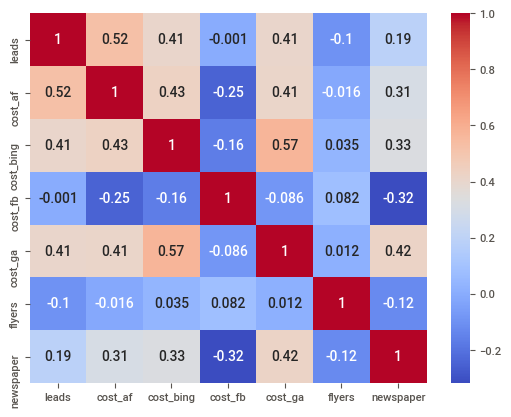

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [13]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

In [15]:
# Define the target feature
#Use different scaler if data contains a lot of 0's
SEED = 50
data_size = 135
# Define the target feature
target_feat = data['leads'].to_numpy()
mdsp_cols = ["cost_fb","cost_ga", "cost_bing", "cost_af", "flyers"]
media_data = data[mdsp_cols].to_numpy()
#weekday_data = data[weekday_cols].to_numpy()
n_media_channels = len(mdsp_cols)
costs = data[mdsp_cols].sum().to_numpy()

#Need to split into train and test

test_data_period_size = 25
split_point = data_size - test_data_period_size
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
cost_train = costs[:split_point, ...]
cost_test = costs[split_point:, ...]
target_train = target_feat[:split_point]
target_test = target_feat[split_point:, ...]
# Extract the weekday columns as extra features
#weekday_data = data[weekday_cols].to_numpy()

# Combine media data and weekday data into a single feature matrix
#combined_features = np.hstack((weekday_cols1))

# Need to scale the features and target_kpi
def nonzero_mean(arr):
    return jnp.nanmean(jnp.where(arr != 0, arr, jnp.nan))

media_scaler = preprocessing.CustomScaler(divide_operation=nonzero_mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

#media_data_train = media_scaler.fit_transform(media_data_train)
#target_train = target_scaler.fit_transform(target_train)
#costs_scaler = cost_scaler.fit_transform(cost_train)


#2nd set of scaled values
media_data_scaled = media_scaler.fit_transform(media_data_train)
target_scaled = target_scaler.fit_transform(target_train.squeeze())
costs_scaled = cost_scaler.fit_transform(cost_train)

media_test_scaled = media_scaler.transform(media_data_test)

# Create a LightweightMMM object
#mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")
#mmm.fit(
    #media=media_data_scaled,
    #media_prior=costs_scaled,
    #target=target_scaled,
    #media_names=mdsp_cols,
    #extra_features=weekday_cols,
    #seed=SEED
#)
#mmm.print_summary()
# Preprocess the data (scaling, transformations, etc.)
#mmm.preprocessing()
#target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# Train the model
#mmm.train()

# Optimize media spend
#optimized_spend = mmm.optimize_media_spend()

#hill_adstock seems to perform best


# Print the optimized media spend
#print("Optimized Media Spend:")
#print(optimized_spend)

# You can also plot the results
#mmm.plot()


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
adstock_models = ["adstock", "hill_adstock", "carryover"]
degrees_season = [1,2,3]

adstock_models = ["hill_adstock"]
degrees_season = [2]


for model_name in adstock_models:
  for degrees in degrees_season:
    mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
    mmm.fit(media=media_data_scaled,
            media_prior=costs_scaled,
            target=target_scaled,
            number_warmup=1000,
            number_samples=1000,
            number_chains=1,
            degrees_seasonality=degrees,
            weekday_seasonality=False,
            seasonality_frequency=52,
            seed=1)

    prediction = mmm.predict(
    media=media_test_scaled,
    #extra_features=organic_data_test_scaled,
    target_scaler=target_scaler)
    p = prediction.mean(axis=0)

    mape = mean_absolute_percentage_error(target_test, p)
    print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

sample: 100%|██████████| 2000/2000 [00:41<00:00, 48.52it/s, 255 steps of size 1.18e-02. acc. prob=0.92]


model_name=hill_adstock degrees=2 MAPE=0.10738953411795958 samples=[579.97284 623.08105 622.97565]


FloatingPointError: ignored

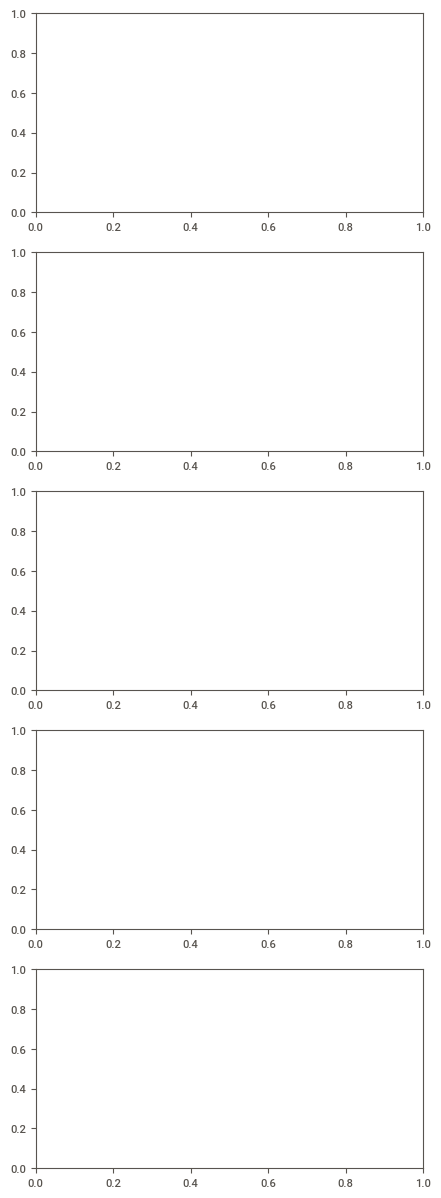

In [25]:
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=mdsp_cols)

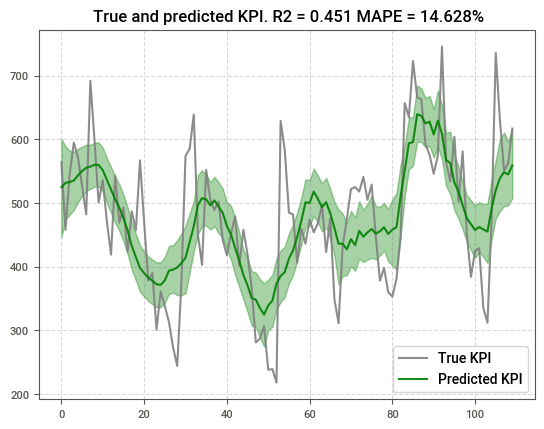

In [26]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [27]:
#new_predictions = mmm.predict(
#   media=media_data_train
#)

new_predictions = mmm.predict(media=media_test_scaled,
                              seed=SEED)

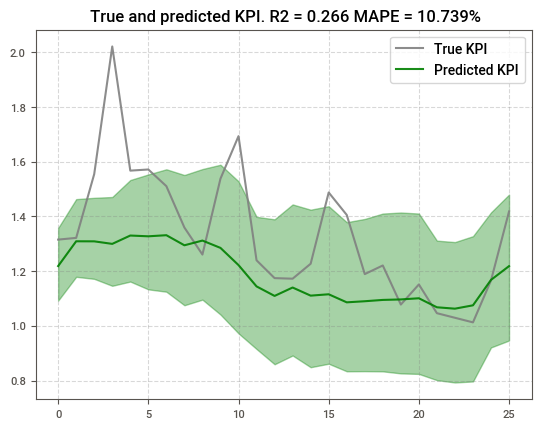

In [28]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_feat[split_point:]))

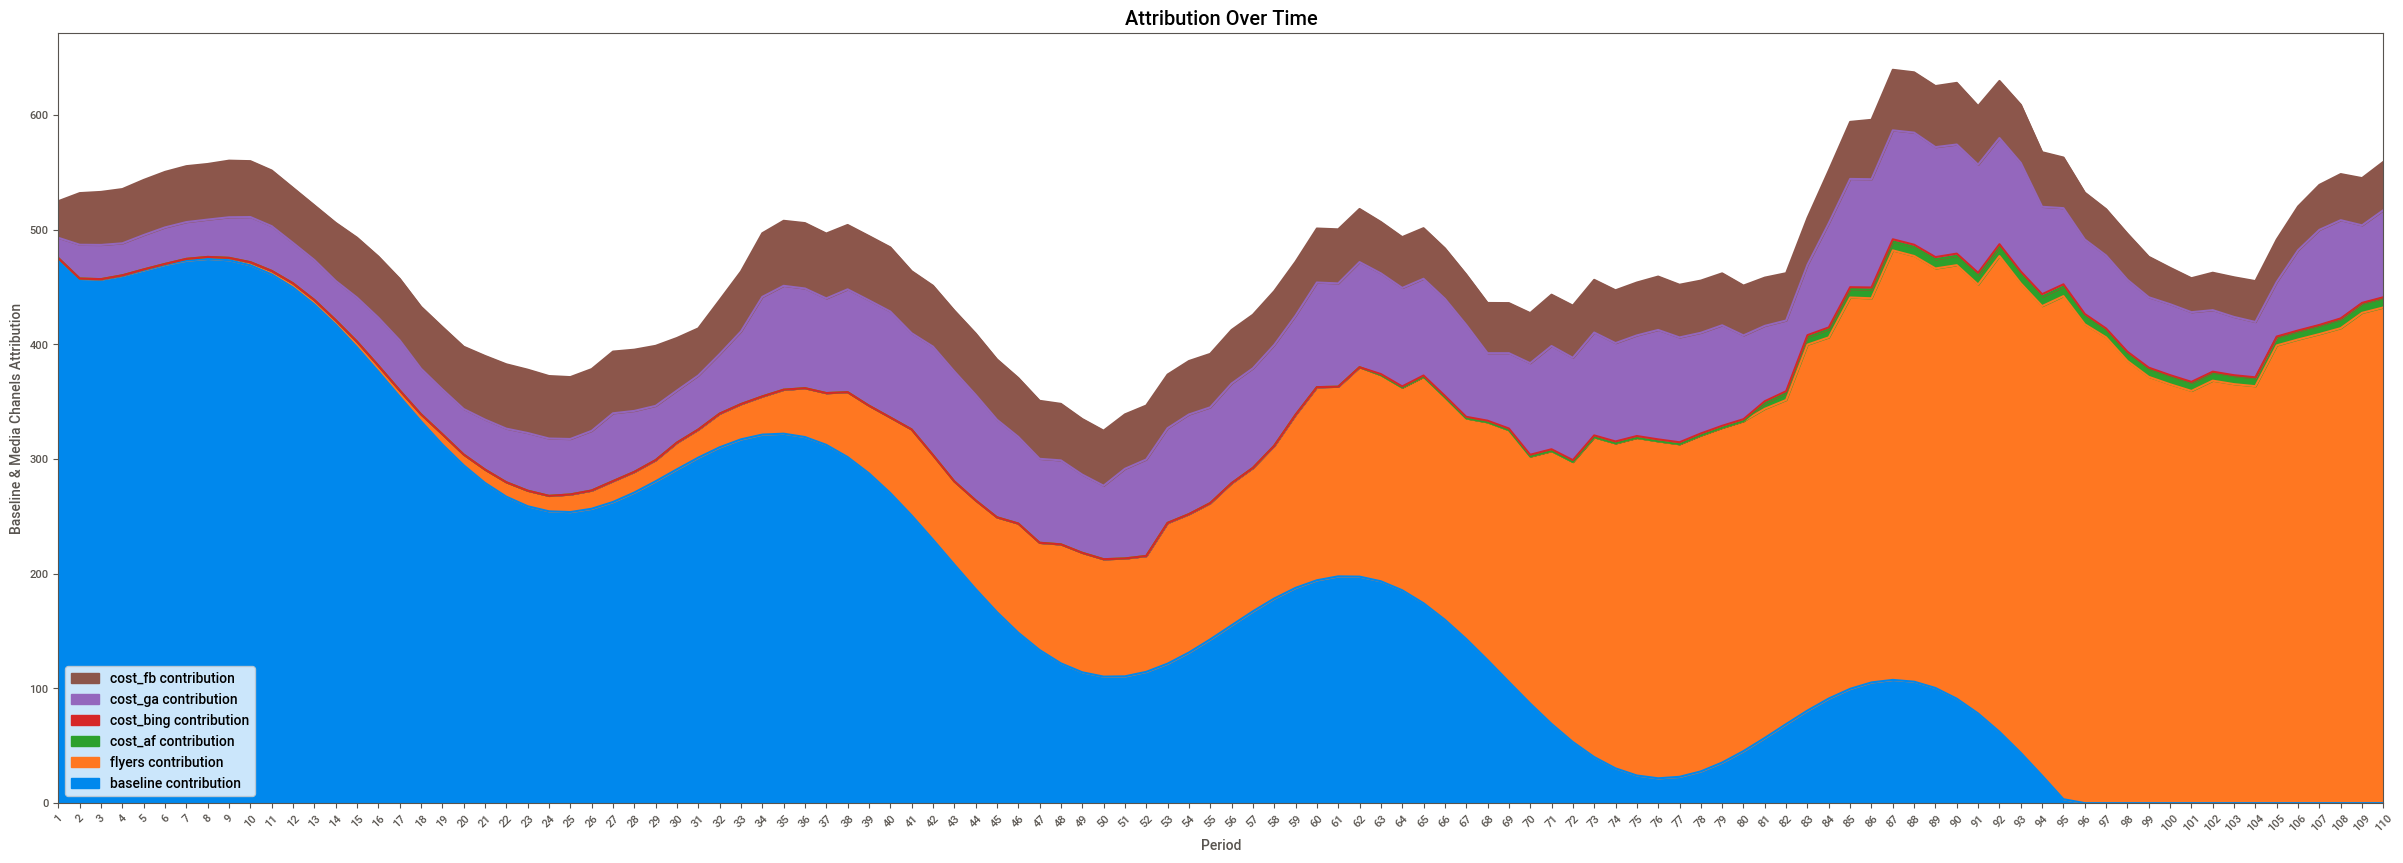

In [29]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )

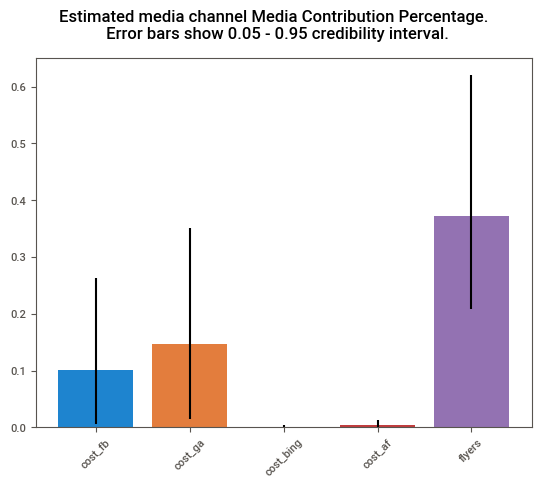

In [30]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)


<ipython-input-31-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


              leads   cost_af  cost_bing   cost_fb   cost_ga    flyers  \
leads      1.000000  0.522348   0.405192 -0.000997  0.405718 -0.101108   
cost_af    0.522348  1.000000   0.432921 -0.249446  0.408578 -0.015511   
cost_bing  0.405192  0.432921   1.000000 -0.164227  0.567642  0.035322   
cost_fb   -0.000997 -0.249446  -0.164227  1.000000 -0.085804  0.082434   
cost_ga    0.405718  0.408578   0.567642 -0.085804  1.000000  0.012369   
flyers    -0.101108 -0.015511   0.035322  0.082434  0.012369  1.000000   
newspaper  0.190218  0.305211   0.328859 -0.317672  0.422920 -0.124798   

           newspaper  
leads       0.190218  
cost_af     0.305211  
cost_bing   0.328859  
cost_fb    -0.317672  
cost_ga     0.422920  
flyers     -0.124798  
newspaper   1.000000  


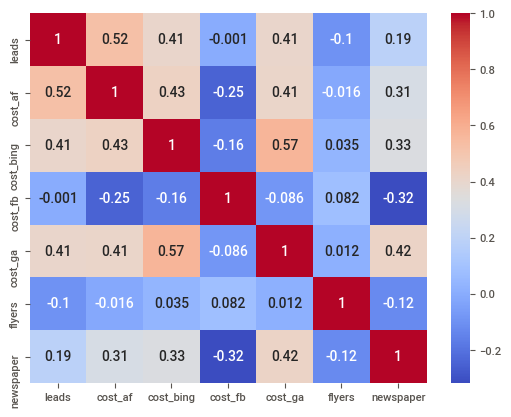

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [31]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

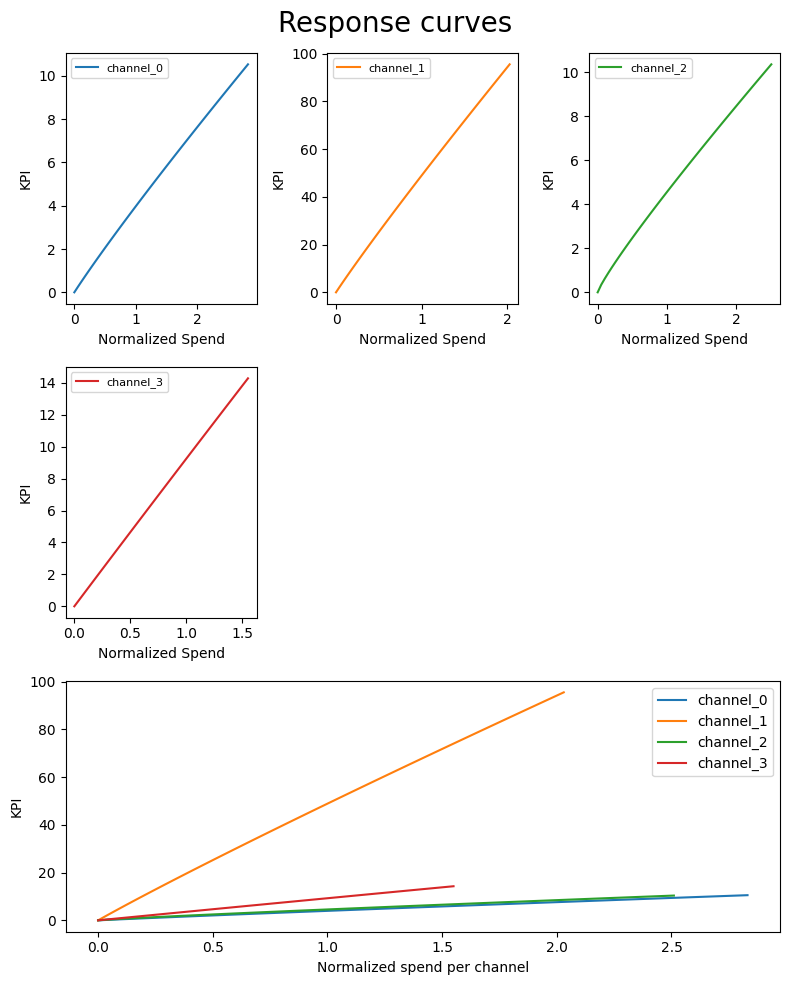

In [112]:
plot.plot_response_curves(target_scaler=target_scaler, media_mix_model=mmm, seed=SEED)


In [ ]:
#print(media_contribution)

In [113]:
predicted_cost = mdsp_cols['cost_fb'].sum()
print(predicted_cost)

TypeError: ignored

In [114]:
import pandas as pd
print(new_predictions)

[[1.2912874  1.3305411  1.3668643  ... 0.945222   0.96945286 1.0302787 ]
 [1.2723286  1.298411   1.3895113  ... 0.9579387  0.9767442  1.0743563 ]
 [1.3260736  1.4085989  1.4536452  ... 1.0058403  1.0060292  1.0123941 ]
 ...
 [1.3744979  1.4408059  1.4763126  ... 0.8019074  0.8081887  0.8800704 ]
 [1.3375077  1.3821305  1.4062717  ... 0.8604722  0.86733556 0.92506665]
 [1.2671088  1.313195   1.3398314  ... 1.0688055  1.0747135  1.1147931 ]]


In [115]:
# Assuming media_contribution is an array or list with the media contribution for each channel
# and mdsp_cols is a list of channel names

# Specific channel you want to predict leads for
channel_name = 'cost_ga'

# Index of the channel in mdsp_cols
channel_index = mdsp_cols.index(channel_name)

# Media contribution for the specific channel
channel_contribution = media_contribution[channel_index]

# Spend or other input variable for the specific channel (you would replace this with the actual value)
channel_spend = 6750

# Calculate the predicted leads for the specific channel
predicted_leads = channel_contribution * channel_spend

print(f"Predicted leads for {channel_name}: {predicted_leads}")


Predicted leads for cost_ga: [ 133.61966 1328.2325   277.4908   612.2491 ]


In [116]:
# Daily channel spend for the cost_ga channel (replace with actual values)
daily_channel_spend = [2000, 3000]

# Predicted leads (from your previous output)
predicted_leads = [81.57488]

# Calculate daily CPL
daily_cpl = [spend / leads for spend, leads in zip(daily_channel_spend, predicted_leads)]

# Calculate average CPL
total_channel_spend = sum(daily_channel_spend)
total_predicted_leads = sum(predicted_leads)
average_cpl = total_channel_spend / total_predicted_leads

print(f"Daily CPL: {daily_cpl}")
print(f"Average CPL: {average_cpl}")


Daily CPL: [24.517351419946927]
Average CPL: 61.29337854986732


In [117]:
prices = jnp.ones(mmm.n_media_channels)

In [118]:
n_time_periods = 12
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods


In [119]:
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -6221.9585531753
            Iterations: 31
            Function evaluations: 279
            Gradient evaluations: 31


In [120]:
optimal_budget_allocation = prices * solution.x
optimal_budget_allocation

Array([237371.88  , 458889.38  ,   7851.0103,  36770.92  ], dtype=float32)

In [121]:
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([288831.62 , 411990.1  ,   7048.624,  33012.875], dtype=float32)

In [122]:
budget, optimal_budget_allocation.sum()

(Array(740883.2, dtype=float32), Array(740883.2, dtype=float32))

In [123]:
budget, jnp.sum(solution.x * prices)

(Array(740883.2, dtype=float32), Array(740883.2, dtype=float32))

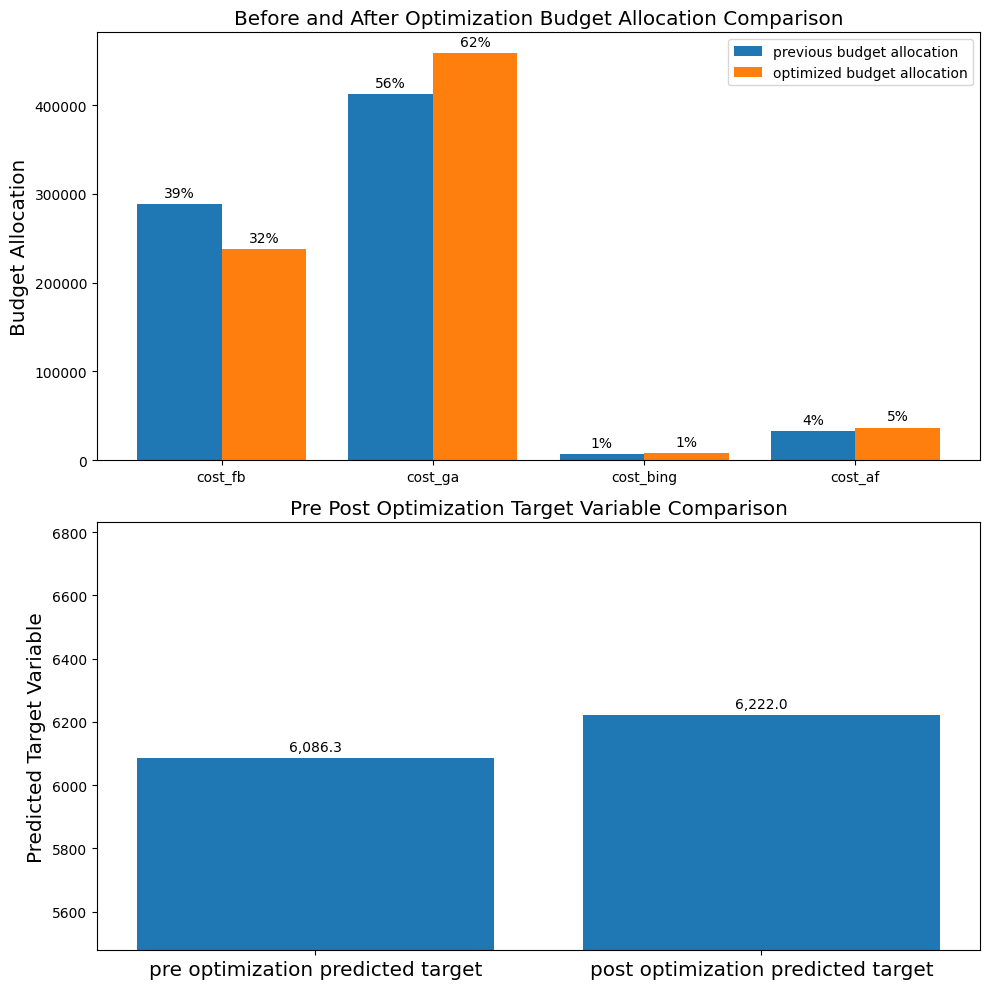

In [124]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_budget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)

In [138]:
#prices = costs / media_data.sum(axis=1)
budget = 1000000
solution = optimize_media.find_optimal_budgets(
    n_time_periods=10,
    media_mix_model=mmm,
    budget=budget,
    prices=costs
)
print(solution)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -10.300476839655742
            Iterations: 5
            Function evaluations: 9
            Gradient evaluations: 1
( message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -10.300476839655742
       x: [ 8.000e+00  8.000e+00  2.545e+00  2.109e+00]
     nit: 5
     jac: [-2.183e-02 -1.436e-01 -4.725e-02 -2.630e-01]
    nfev: 9
    njev: 1, Array(-8.12963987, dtype=float64), Array([0.12578425, 0.12578425, 0.04002226, 0.03316131], dtype=float32))
